# Function histogram

## Synopse

Image histogram.

- **h = histogram(f)**

  - **f**: Input image. Pixel data type must be integer.
  - **h**: Output, integer vector.

## Description

This function computes the number of occurrence of each pixel value. 
The function *histogram_eq* is implemented to show an implementation based
on the equation of the histogram.

## Function Code

In [12]:
import numpy as np

def histogram(f):

    return np.bincount(f.ravel())

## Function Code for brute force implementation

In [13]:
def histogram_eq(f):

    from numpy import amax, zeros, arange, sum

    n = amax(f) + 1
    h = zeros((n,),int)
    for i in arange(n):
        h[i] = sum(i == f)
    return h

## Function code for bidimensional matrix implementation



In [14]:
def histogram_eq1(f):

    import numpy as np
    n = f.size
    m = f.max() + 1
    haux = np.zeros((m,n),int)
    fi = f.ravel()
    i = np.arange(n)
    haux[fi,i] = 1
    h = np.add.reduce(haux,axis=1)
    return h

## Examples

In [15]:
testing = (__name__ == "__main__")

if testing:
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

### Numerical examples

In [16]:
if testing:

    f = np.array([[0,1,2,3,4],
                  [4,3,2,1,1]], 'uint8')

    h = ia.histogram(f)
    print(h.dtype)
    print(h)

int64
[1 3 2 2 2]


In [17]:
if testing:
    h1 = ia.histogram_eq(f)
    print(h1.dtype)
    print(h1)

int64
[1 3 2 2 2]


In [18]:
if testing: 
    h1 = ia.histogram_eq1(f)
    print(h1.dtype)
    print(h1)

int64
[1 3 2 2 2]


### Example 1

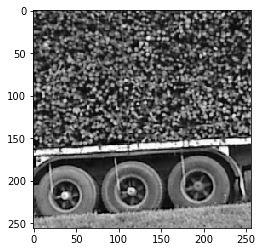

In [19]:
if testing:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    f = mpimg.imread('../data/woodlog.tif')
    plt.imshow(f,cmap='gray')

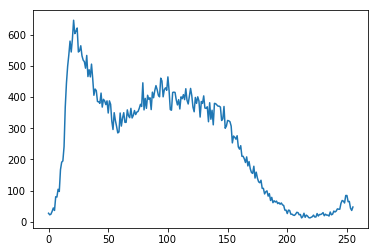

In [20]:
if testing:
    h = ia.histogram(f)
    plt.plot(h)

## Speed performance

In [21]:
if testing:
    import numpy as np
    from numpy.random import rand, seed
   
    seed([10])
    f = (255 * rand(1000,1000)).astype('uint8')
    %timeit h = ia.histogram(f)
    %timeit h1 = ia.histogram_eq(f)
    %timeit h2 = ia.histogram_eq1(f)

100 loops, best of 3: 3.17 ms per loop
1 loop, best of 3: 631 ms per loop
1 loop, best of 3: 746 ms per loop


## Equation

$$    h(i) = card\{p | f(p)=i\} \\
    \text{or} \\
    h(i) = \sum_p \left\{ 
      \begin{array}{l l}
        1 & \quad \text{if} \ f(p) = i\\
        0 & \quad \text{otherwise}\\
      \end{array} \right.
$$

In [22]:
if testing: 
    print(histogram(np.array([3,7,0,0,3,0,10,7,0,7])) == \
          np.array([4, 0, 0, 2, 0, 0, 0, 3, 0, 0, 1]))

[ True  True  True  True  True  True  True  True  True  True  True]
